# 5 Class Modeling

The purpose of this report is to do modeling and classification on 5 class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import scipy.sparse as sp
from scipy.sparse import csr_matrix


In [2]:
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,1,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,5,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,5,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,3,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),5,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,1,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,5,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,5,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,5,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


In [3]:
with open('2ClassDf.pkl', 'rb') as f:
    df2 = pickle.load(f)
df2

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,1,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,1,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),1,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,0,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,1,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,1,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,1,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


Dealing with multiclass dataset so now using df instead of df2.

In [4]:
df['star_rating'].value_counts()

5    2313224
4     763602
3     360091
2     214971
1     194185
Name: star_rating, dtype: int64

We'll use a sample dataset of 1000 for each star rating so the classes are balanced.

In [5]:
rating1 = df[df['star_rating']==1].sample(10000, random_state=1)
rating2 = df[df['star_rating']==2].sample(10000, random_state=1) 
rating3 = df[df['star_rating']==3].sample(10000, random_state=1)
rating4 = df[df['star_rating']==4].sample(10000, random_state=1) 
rating5 = df[df['star_rating']==5].sample(10000, random_state=1)


sampled_df = pd.concat([rating1, rating2, rating3, rating4, rating5])

In [6]:
sampled_df = sampled_df.drop(columns='total_votes')

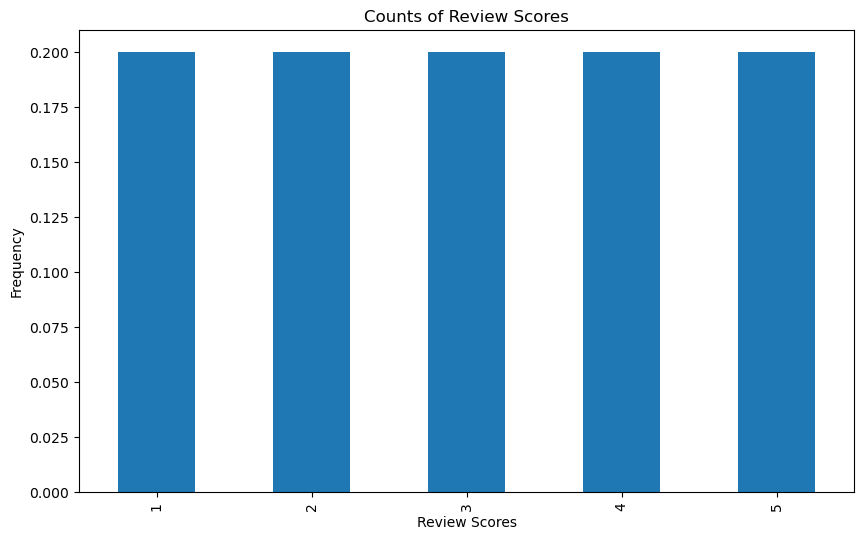

In [7]:
# Sanity check
figure = plt.figure(figsize=(10,6))
sampled_df['star_rating'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.title('Counts of Review Scores')
plt.show()

The classes are now 20% each and there is no class imbalance.

#### Train/Test Split

In [8]:
# assigning Reviewer_Score as target variable and everything else as X 
X_sample = sampled_df.drop(columns=['star_rating'])
y_sample = sampled_df['star_rating']

# splitting the data 
X_remainder_sample, X_test_sample, y_remainder_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1, stratify=y_sample)

In [9]:
# Creating a validation set
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(X_remainder_sample, y_remainder_sample, test_size=0.3, random_state=1, stratify=y_remainder_sample)

#### Vectorization

The `review_body` and `review_headline` need to be vectorized so there is only numeric columns before modeling can be done. For vectorizing, bag of words will be used.

In [10]:
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

In [11]:
# sampled_df = sampled_df.drop(columns=['product_title', 'review_headline', 'review_body'])

In [12]:
%%time
# Instantiate
stemmer = PorterStemmer()

bag_body = CountVectorizer(stop_words="english", min_df=10)

# Fitting 
bag_body.fit(X_train_review_sample)


# Transform
train_bag_sample = bag_body.transform(X_train_review_sample)
valid_bag_sample = bag_body.transform(X_valid_review_sample)
test_bag_sample = bag_body.transform(X_test_review_sample)

CPU times: total: 2.06 s
Wall time: 2.17 s


In [13]:
%%time
# This one is for X_remainder when cv is not done 

### For X_remainder
bag_body2 = CountVectorizer(stop_words="english", min_df=10)
bag_body2.fit(X_remainder_review_sample)
remainder_bag_sample = bag_body2.transform(X_remainder_review_sample)
test_bag_sample2 = bag_body2.transform(X_test_review_sample)

CPU times: total: 2.45 s
Wall time: 2.53 s


In [14]:
X_train_headline_sample = X_train_sample['review_headline']
X_valid_headline_sample = X_valid_sample['review_headline']
X_test_headline_sample = X_test_sample['review_headline']
# X_remainder will be needed for when cv is being done
X_remainder_headline_sample = X_remainder_sample['review_headline']

In [15]:
%%time
# Instantiate
bag_headline = CountVectorizer(stop_words="english", min_df=50)

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_headline_sample = bag_headline.transform(X_train_headline_sample)
valid_headline_sample = bag_headline.transform(X_valid_headline_sample)
test_headline_sample = bag_headline.transform(X_test_headline_sample)

CPU times: total: 312 ms
Wall time: 436 ms


In [16]:
%%time
# For X_remainder
bag_headline2 = CountVectorizer(stop_words="english", min_df=10)
bag_headline2.fit(X_remainder_headline_sample)
remainder_headline_sample = bag_headline2.transform(X_remainder_headline_sample)
test_headline_sample2 = bag_headline2.transform(X_test_headline_sample)

CPU times: total: 422 ms
Wall time: 540 ms


In [17]:
bag_headline.get_feature_names_out()

array(['10', 'adorable', 'amazing', 'ankle', 'apart', 'arch', 'awesome',
       'bad', 'bag', 'balance', 'beautiful', 'best', 'better', 'beware',
       'big', 'bigger', 'bit', 'black', 'boot', 'boots', 'bought', 'box',
       'broke', 'buy', 'calf', 'came', 'casual', 'cheap', 'cheaply',
       'color', 'comfort', 'comfortable', 'comfy', 'cool', 'crocs',
       'cute', 'daughter', 'day', 'defective', 'design', 'did', 'didn',
       'different', 'disappointed', 'disappointing', 'does', 'doesn',
       'don', 'durable', 'easy', 'excellent', 'expected', 'far', 'fast',
       'favorite', 'feel', 'feels', 'feet', 'fell', 'fine', 'fit', 'fits',
       'flip', 'flops', 'foot', 'fun', 'good', 'gorgeous', 'got', 'great',
       'half', 'happy', 'hard', 'heavy', 'heel', 'heels', 'high',
       'horrible', 'hurt', 'item', 'just', 'large', 'larger', 'leather',
       'light', 'like', 'liked', 'little', 'long', 'look', 'looked',
       'looking', 'looks', 'loose', 'lot', 'love', 'loved', 'loves',
 

In [18]:
# combining headline and bag counts
train_count = sp.hstack([train_headline_sample, train_bag_sample])
valid_count = sp.hstack([valid_headline_sample, valid_bag_sample])
test_count = sp.hstack([test_headline_sample, test_bag_sample])

In [19]:
# combining headline and bag counts
remainder_count = sp.hstack([remainder_headline_sample, remainder_bag_sample])
test_count2 = sp.hstack([test_headline_sample2, test_bag_sample2])

In [20]:
train_count

<28000x3761 sparse matrix of type '<class 'numpy.int64'>'
	with 508621 stored elements in Compressed Sparse Row format>

In [21]:
body_words = bag_body.get_feature_names_out()
tagged_body_words = ['b_' + feature for feature in body_words]
headline_words = bag_headline.get_feature_names_out()
tagged_headline_words = ['h_' + feature for feature in headline_words]
sample_vocab = tagged_headline_words + tagged_body_words

In [22]:
# FOR X_REMAINDER
body_words2 = bag_body2.get_feature_names_out()
tagged_body_words2 = ['b_' + feature for feature in body_words2]
headline_words2 = bag_headline2.get_feature_names_out()
tagged_headline_words2 = ['h_' + feature for feature in headline_words2]
sample_vocab2 = tagged_headline_words2 + tagged_body_words2

In [23]:
len(sample_vocab)

3761

In [24]:
train_count

<28000x3761 sparse matrix of type '<class 'numpy.int64'>'
	with 508621 stored elements in Compressed Sparse Row format>

In [25]:
train_df = pd.DataFrame(train_count.toarray(), columns=sample_vocab)
valid_df = pd.DataFrame(valid_count.toarray(), columns=sample_vocab)
test_df = pd.DataFrame(test_count.toarray(), columns=sample_vocab)

In [26]:
# For X_remainder
remainder_df = pd.DataFrame(remainder_count.toarray(), columns=sample_vocab2)
test_df2 = pd.DataFrame(test_count2.toarray(), columns=sample_vocab2)

In [27]:
X_train_sample = X_train_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_valid_sample = X_valid_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_test_sample = X_test_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [28]:
# For X_remainder
X_remainder_sample = X_remainder_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [29]:
combined_train = pd.concat([X_train_sample, train_df], axis=1)
combined_valid = pd.concat([X_valid_sample, valid_df], axis=1)
combined_test = pd.concat([X_test_sample, test_df], axis=1)

In [30]:
# For X_remainder
combined_remainder = pd.concat([X_remainder_sample, remainder_df], axis=1)
combined_test2 = pd.concat([X_test_sample, test_df2], axis=1)

In [31]:
combined_test2

,helpful_votes,verified_purchase,year,month,h_10,h_100,h_11,h_12,h_13,h_14,...,b_zappos,b_zero,b_zip,b_zipped,b_zipper,b_zippered,b_zippers,b_zipping,b_zips,b_zumba
0,0,1,2014,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2012,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2015,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2015,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2008,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,2015,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,1,2014,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,1,2013,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,1,1,2013,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Instantiate
ss = StandardScaler()

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

In [33]:
# For X_remainder
ss2 = StandardScaler()
X_remainder_scaled = ss.fit_transform(combined_remainder)
X_test_scaled2 = ss.transform(combined_test2)

## Logistic Regression

In [34]:
log3 = LogisticRegression(solver='liblinear', C=0.1, random_state=1)
log3.fit(X_train_scaled, y_train_sample)
log3.score(X_test_scaled, y_test_sample)

0.4649

When compared to the imbalanced class results, the accuracy had decreased from 78.01% to 77.55% which is not that big of a difference. The most important part is the recall and precision.

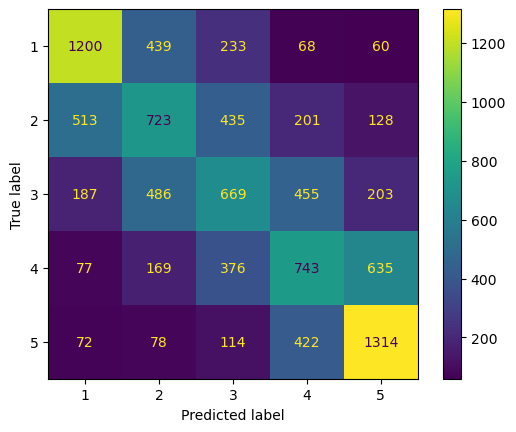

In [35]:
ConfusionMatrixDisplay.from_estimator(log3, X_test_scaled, y_test_sample);

In [36]:
# Get rating predictions
y_pred = log3.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)

# label rows and columnsConfusionMatrixDisplay.from_estimator(log3, X_test_scaled, y_test_sample);
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5"],
    index=["True 1", "True 2", "True 3", "True 4", "True 5"]
)
display(cf_df)

print(classification_report(y_test_sample, y_pred))

,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
True 1,1200,439,233,68,60
True 2,513,723,435,201,128
True 3,187,486,669,455,203
True 4,77,169,376,743,635
True 5,72,78,114,422,1314


              precision    recall  f1-score   support

           1       0.59      0.60      0.59      2000
           2       0.38      0.36      0.37      2000
           3       0.37      0.33      0.35      2000
           4       0.39      0.37      0.38      2000
           5       0.56      0.66      0.61      2000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000

